In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from IPython.display import Image
from IPython.core.display import HTML

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
data = train_df.append(test_df)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
print(women)
print(type(women))

rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

1      1
2      1
3      1
8      1
9      1
      ..
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64
<class 'pandas.core.series.Series'>
% of women who survived: 0.7420382165605095


In [16]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [18]:
y = train_df["Survived"]
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [40]:
# y = train_df["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_df[features])
# X_test = pd.get_dummies(test_df[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

Your submission was successfully saved!


# My Contribution
References (Taken help from):
1) https://youtu.be/hxauqndYYUo

2) https://youtu.be/50sWPzlmxOE

3) https://youtu.be/HnLiVutur8A

4) https://www.kaggle.com/spidy20/titanic-eda-with-80-prediction-on-sb

5) https://www.kaggle.com/bhatiashivam/ahoy-top-3-the-only-notebook-you-need

The original tutorial submission of titanic data set used the concept of Random Forest Classifier to predict the survived passengers. Base score we get is: 0.77511

I experimented on the same notebook using various other classification models such as Extra Trees Classifiers, ADABoost Classifier and Logistic Regression. However none of the models gave me a better score than the Random Forest Classifier.
This meant that the solution to increasing the score was not using different models, but applying some modifications and feature selection to the existing data set.

Original Score:
<img src="https://i.imgur.com/1J0Wz8D.png">

For my final contribution:
- I used the concepts of pandas qcut, Label Fit Transformers and used KNN Classifier to train the model.

- Started by visualising the data by creating a bar chart function that displays the survived and dead passengers. 

- Different bar charts of survived passengers by Sex, Class, Number of Children, Embarked boat or not.

- After getting some insight from youtube videos, noticed that 'Title' column holds great value in predicting richness factor of a  passenger. Also notices that richer the passenger, more chances of that passenger surviving.

- Then created column that holds family information. Done by combining 'Parch' Children and 'SibSp' sibling spouse column values.

- Filled all missing values in 'Age' and 'Fare' columns with median of all values.

- Used qcut to sort the age and fare data by quartiles. This gave information that age affects survival and fare gives us info on richness of person that also affects the passengers survival rate.

- Normalised the columns by using Label Fit Transformer so that it fits in the KNN Model.

- Divided data set into Train and Test set.

- Used KNN classifier as it is a non-parametric, lazy learning algorithm. Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.

- Here parameters of KNN matter (Specified Below).

- Submitted prediction and got a score of 0.81818
<img src="https://i.imgur.com/nBmbf5h.png">
<img src="https://i.imgur.com/Tkp8qT9.png">





Visualising the number of survived and dead passengers

In [83]:
survived = train_df[train_df['Survived']==1]['Sex'].value_counts()
survived

female    233
male      109
Name: Sex, dtype: int64

     female  male
Sex     233   109
Sex      81   468
          female  male
Survived     233   109
Dead          81   468


<AxesSubplot:>

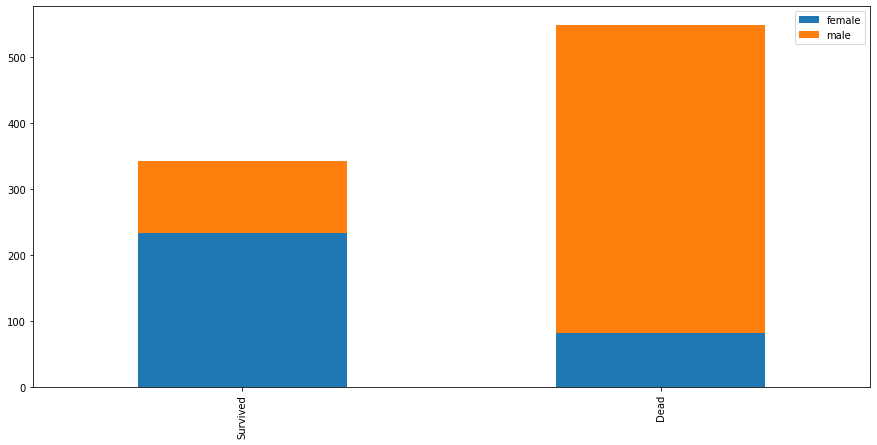

In [89]:
survived = train_df[train_df['Survived']==1]['Sex'].value_counts()
dead = train_df[train_df['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived,dead])
print(df)
df.index = ['Survived','Dead']
print(df)
df.plot(kind='bar', stacked=True, figsize=(15,7))

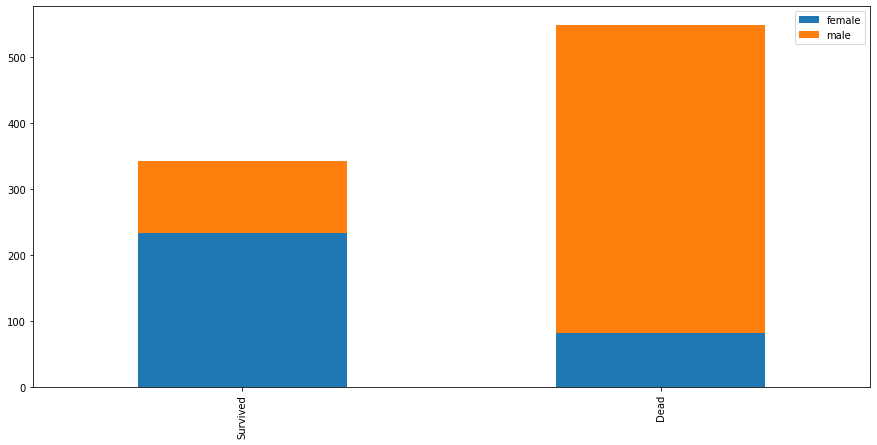

In [90]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,7))
    
bar_chart('Sex')

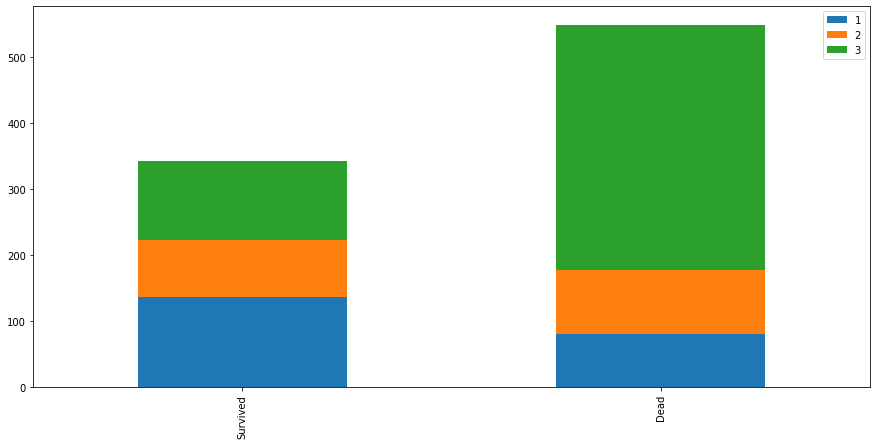

In [30]:
bar_chart('Pclass')

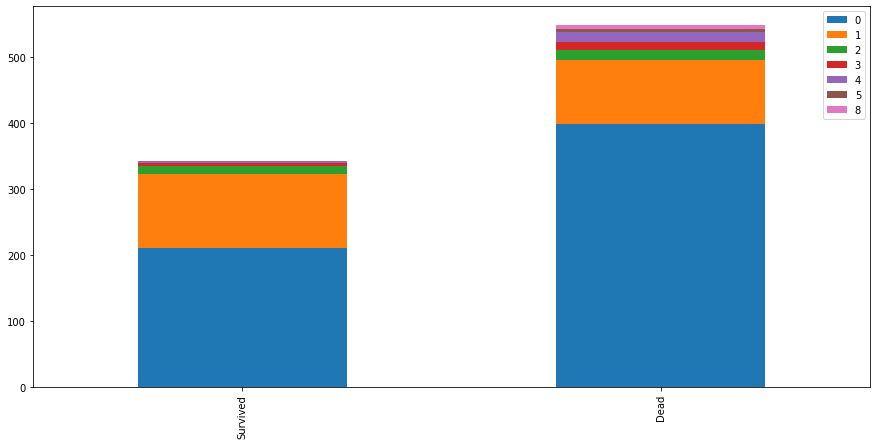

In [31]:
bar_chart('SibSp')

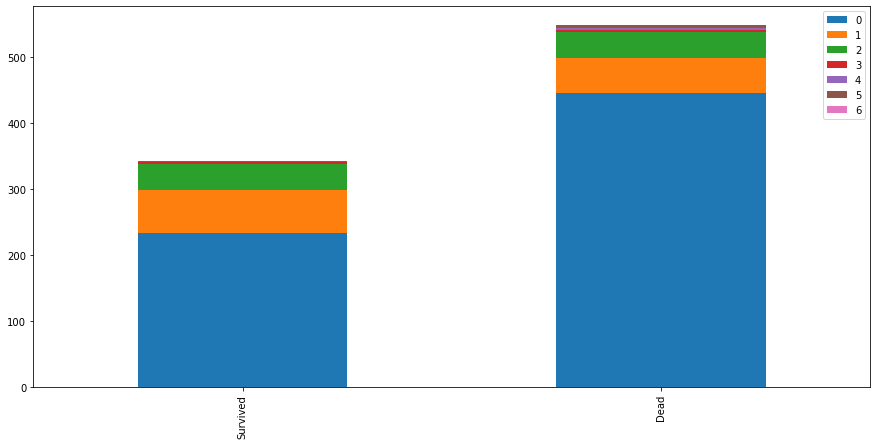

In [43]:
bar_chart('Parch')

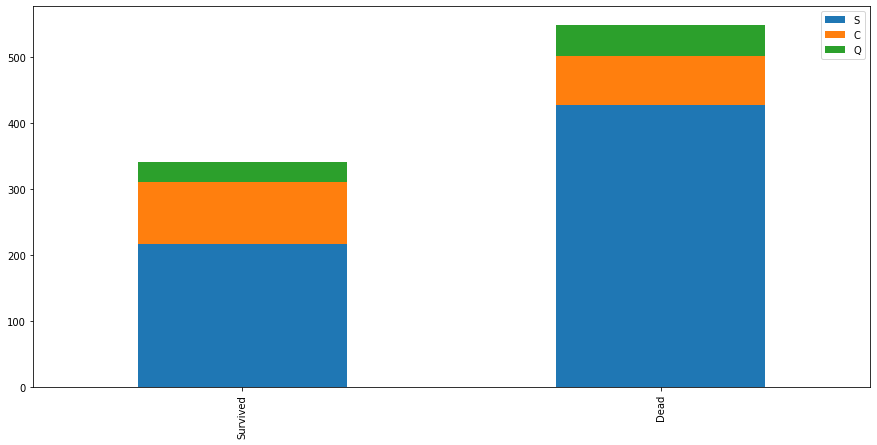

In [32]:
bar_chart('Embarked')

Checking the Titles that the passengers carried

In [52]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [92]:
train_df['Title'] = train_df['Name']
train_df.head()
for name_string in train_df['Title']:
    train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [68]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


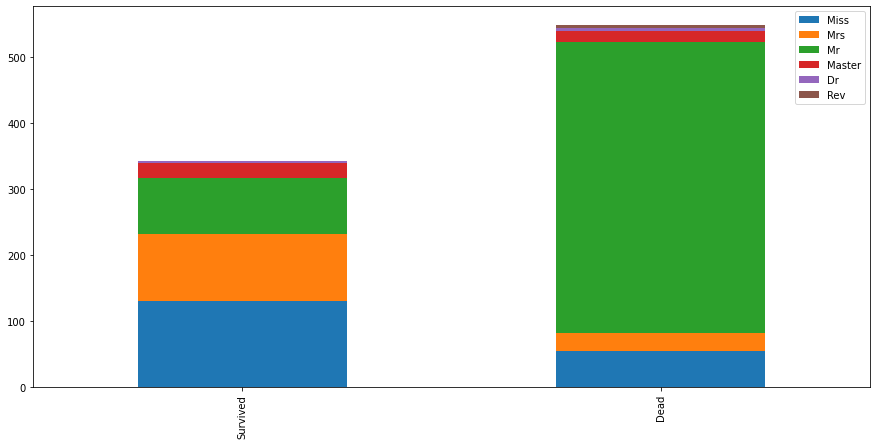

In [95]:
bar_chart('Title')

1) Adding all the titles to a string array. This will help in grouping the passenger by their titles. Title carries significance because it gives us the Richness Status of the passenger. The richer the passenger, more the chances of that passenger surviving

2) Adding median values to all the missing entries in the age column

In [93]:
title_changes = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Mrs',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
train_df.replace({'Title': title_changes}, inplace=True)
titles = ['Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Rev']
for title in titles:
    age_to_impute = train_df.groupby('Title')['Age'].median()[titles.index(title)]
    train_df.loc[(train_df['Age'].isnull()) & (train_df['Title'] == title), 'Age'] = age_to_impute
train_df['Age'] = train_df['Age'][:891]
test_df['Age'] = train_df['Age'][891:]
#train_df.drop('Title', axis = 1, inplace = True)

In [94]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [98]:
train_df.groupby('Title')['Age'].median()[titles.index(title)]

Title
Dr        46.5
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Rev       46.5
Name: Age, dtype: float64

In [77]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


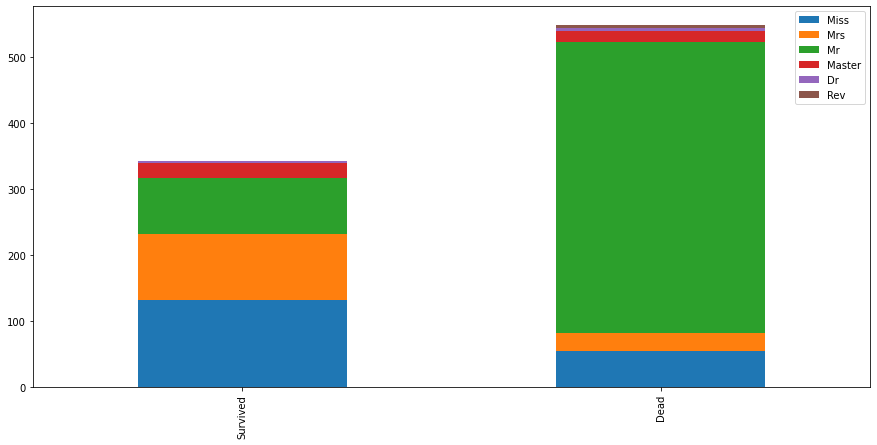

In [72]:
bar_chart('Title')

Creating array called Family Size containing Children, Sibling and Spouse data columns

In [48]:
data['Family_Size'] = data['Parch'] + data['SibSp']
train_df['Family_Size'] = data['Family_Size'][:891]
test_df['Family_Size'] = data['Family_Size'][891:]

1) Reordering passenger names

2) Adding mean values to missing fare values

3) Creating a Family Survival Value that indicates the family survival rate. Setting default as 0.5

In [50]:
data['Last_Name'] = data['Name'].apply(lambda x: str.split(x, ",")[0])
data['Fare'].fillna(data['Fare'].mean(), inplace=True)
DEFAULT_SURVIVAL_VALUE = 0.5
data['Family_Survival'] = DEFAULT_SURVIVAL_VALUE

Locating all passengers with Family survival information available. This will help in inducing whether the passenger is alone or not or has family.

In [51]:
for grp, grp_df in data[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId',
                           'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['Last_Name', 'Fare']):   
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            smax = grp_df.drop(ind)['Survived'].max()
            smin = grp_df.drop(ind)['Survived'].min()
            passID = row['PassengerId']
            if (smax == 1.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
            elif (smin==0.0):
                data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0
print("Number of passengers with family survival information:", 
      data.loc[data['Family_Survival']!=0.5].shape[0])

Number of passengers with family survival information: 420


Finding passenger who either have families or are in groups by sorting by ticket number

In [52]:
for _, grp_df in data.groupby('Ticket'):
    if (len(grp_df) != 1):
        for ind, row in grp_df.iterrows():
            if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin==0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0                      
print("Number of passenger with family/group survival information: " 
      +str(data[data['Family_Survival']!=0.5].shape[0]))
train_df['Family_Survival'] = data['Family_Survival'][:891]
test_df['Family_Survival'] = data['Family_Survival'][891:]

Number of passenger with family/group survival information: 546


1) Using qcut to arrange Fare values. This helps in distributing data according to quartiles.

2) Using Label Fit Transform, this helps in normalising data

In [53]:
data['Fare'].fillna(data['Fare'].median(), inplace = True)
data['FareBin'] = pd.qcut(data['Fare'], 5)
label = LabelEncoder()
data['FareBin_Code'] = label.fit_transform(data['FareBin'])
train_df['FareBin_Code'] = data['FareBin_Code'][:891]
test_df['FareBin_Code'] = data['FareBin_Code'][891:]
train_df.drop(['Fare'], 1, inplace=True)
test_df.drop(['Fare'], 1, inplace=True)

Using qcut and Label transform on Age values as well

In [54]:
data['AgeBin'] = pd.qcut(data['Age'], 4)
label = LabelEncoder()
data['AgeBin_Code'] = label.fit_transform(data['AgeBin'])
train_df['AgeBin_Code'] = data['AgeBin_Code'][:891]
test_df['AgeBin_Code'] = data['AgeBin_Code'][891:]
train_df.drop(['Age'], 1, inplace=True)
test_df.drop(['Age'], 1, inplace=True)

1) Normalising 'Sex' data to replace string values with integers. 0 for male, 1 for female

2) Dropping non-normalised columns

In [55]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
               'Embarked'], axis = 1, inplace = True)
test_df.drop(['Name','PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin',
              'Embarked'], axis = 1, inplace = True)

In [56]:
train_df.head(10)

,Survived,Pclass,Sex,Family_Size,Family_Survival,FareBin_Code,AgeBin_Code
0,0,3,0,1,0.5,0,0
1,1,1,1,1,0.5,4,3
2,1,3,1,0,0.5,1,1
3,1,1,1,1,0.0,4,2
4,0,3,0,0,0.5,1,2
5,0,3,0,0,0.5,1,1
6,0,1,0,0,0.5,4,3
7,0,3,0,4,0.0,2,0
8,1,3,1,2,1.0,2,1
9,1,2,1,1,0.0,3,0


Creating Training and Testing set

In [57]:
X = train_df.drop('Survived', 1)
y = train_df['Survived']
X_test = test_df.copy()

1) Standardizing features by removing the mean and scaling to unit variance

2) Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data

In [58]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X_test = std_scaler.transform(X_test)

1) ‘n_neighbors‘ are the number of neighbors that will vote for the class of the target point

2) For the ‘uniform‘ weight, each of the k neighbors has equal vote whatever its distance from the target point. If the weight is ‘distance‘ then voting weightage or importance varies by inverse of distance; those points who are nearest to the target point have greater influence than those who are farther away.

In [59]:
n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = list(range(1,50,5))
hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}
gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, verbose=True, 
                cv=10, scoring = "roc_auc")
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8783125088419206
KNeighborsClassifier(leaf_size=26, n_neighbors=18)


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed:   18.2s finished


Predicting score on Test set

In [60]:
gd.best_estimator_.fit(X, y)
y_pred = gd.best_estimator_.predict(X_test)

1) Weights- Uniform weights. All points in each neighborhood are weighted equally.

2) Algorithm- Auto will attempt to decide the most appropriate algorithm based on the values passed to fit method.

3) Leaf Size- Affects the speed of the construction and query, as well as the memory required to store the tree.

4) Power- When p = 1, this is equivalent to using manhattan_distance

5) Using Minkowski Tree

6) njobs- The number of parallel jobs to run for neighbors search


In [61]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=6, p=2, 
                           weights='uniform')
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [62]:
temp = pd.DataFrame(pd.read_csv("./test.csv")['PassengerId'])
temp['Survived'] = y_pred
temp.to_csv("KNN_submission.csv", index = False)